In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import euclidean
from math import sqrt
from tqdm import tqdm

# Defining The Euclidean Distance Function

In [2]:
# euclidean_distance function
def euclidean_distance(a, b):
	return sqrt(sum((e1-e2)**2 for e1, e2 in zip(a,b)))

In [3]:
# comparaison between the scipy euclidean distance implementation and mine  
a = np.random.rand(3)*100
b = np.random.rand(3)*100
print(euclidean_distance(a, b))
print(euclidean(a, b))

122.17238320992288
122.17238320992288


# Importing the Dataset

In [4]:
mnist = fetch_openml('mnist_784', cache=False)

In [5]:
print(mnist.data.shape)

(70000, 784)


In [6]:
x = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Pre-Processing the Dataset

In [7]:
x /= 255.0

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
assert(X_train.shape[0] + X_test.shape[0] == mnist.data.shape[0])
X_train.shape, y_train.shape

((52500, 784), (52500,))

In [10]:
K = 10

# KNN function

In [11]:
from queue import PriorityQueue

In [28]:
def KPP(x,X, Y, k):
    distances = PriorityQueue() # A list of all distnances with their respective index
    knn = np.zeros(10) # list of available classes (here 10 because we're working on minst ds)
    for i in range(len(X)):
      d = euclidean_distance(x, X[i])
      distances.put((d, i))
 
    for i in range(k):
      x, y = distances.get()
      knn[Y[y]] += 1

    return np.where(knn == max(knn))[0][0]

The Prediction result is 7 while the real result is 7


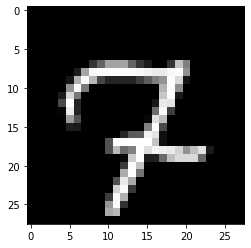

In [13]:
c = random.randint(X_test.shape[0])
predict1va = KPP(X_test[c], X_train, y_train, K)
plt.imshow(X_test[c].reshape(28, 28), cmap='gray')
print('The Prediction result is '+str(predict1va)+' while the real result is '+str(y_test[c]))

In [14]:
def KNN(x,X, Y, k):
    result = []
    for i in tqdm(x):
      result.append(KPP(i, X_train, y_train, k))

    return result

In [23]:
predict = KNN(X_test[:100], X_train, y_train, K)

100%|██████████| 100/100 [33:05<00:00, 19.85s/it]


In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test[:100], predict))

0.98


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X_train, y_train) #Fitting model on entire dataset X
y_pred = knn.predict(X_test[:100]) # Predicting

In [27]:
print(accuracy_score(y_test[:100], y_pred))

0.98
